# Demo of Ch6. Generative Adversarial Network
----
This is the sample code of TU-ETP-AD1062 Machine Learning Fundamentals.

For more information, please refer to:
https://sites.google.com/view/tu-ad1062-mlfundamentals/

## Import Packages
----

In [14]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

from keras.datasets import mnist
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

%matplotlib inline

## Load Dataset
----

(60000, 28, 28)

(60000, 784)

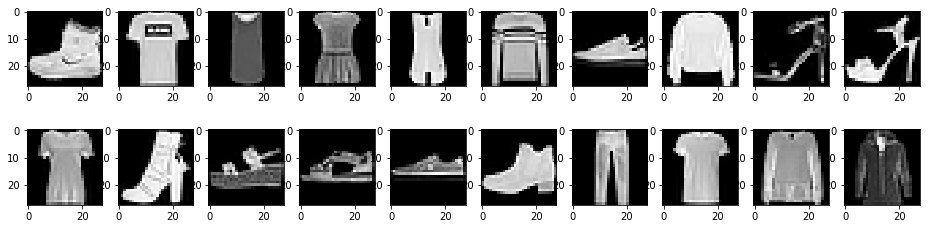

In [17]:
(I_train, y_train), (I_test, y_test) = fashion_mnist.load_data()

I_train = np.array(I_train) / 255.0
y_train = np.array(y_train)

I_test = np.array(I_test) / 255.0
y_test = np.array(y_test)
display(I_train.shape)

X_train = I_train.reshape((len(I_train), np.prod(I_train.shape[1:])))
X_test = I_test.reshape((len(I_test), np.prod(I_test.shape[1:])))
display(X_train.shape)

plt.figure(figsize=(16, 4))
for i in range(0,20):
    plt.subplot(2, 10, i+1)
    plt.imshow(I_train[i,:], cmap='gray')

## 6.1. Auto-encoder

Reference: https://blog.keras.io/building-autoencoders-in-keras.html

### Demo 6.1.1. Auto-Encoder
---

In [11]:
encoding_dim = 128

def build_autoencoder():
    input_img = Input(shape=(784,))
    
    encoded = Dense(encoding_dim, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)

    # Auto-Encoder
    autoencoder = Model(input_img, decoded)

    # Encoder
    encoder = Model(input_img, encoded)

    # Decoder
    encoded_input = Input(shape=(encoding_dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(encoded_input, decoder_layer(encoded_input))
    
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    
    return autoencoder, encoder, decoder

In [4]:
autoencoder, encoder, decoder = build_autoencoder()
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.5320 - val_loss: 0.4577
Epoch 2/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.4240 - val_loss: 0.4058
Epoch 3/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.3951 - val_loss: 0.3876
Epoch 4/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.3782 - val_loss: 0.3723
Epoch 5/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.3643 - val_loss: 0.3601
Epoch 6/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.3533 - val_loss: 0.3503
Epoch 7/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.3444 - val_loss: 0.3425
Epoch 8/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.3373 - val_los

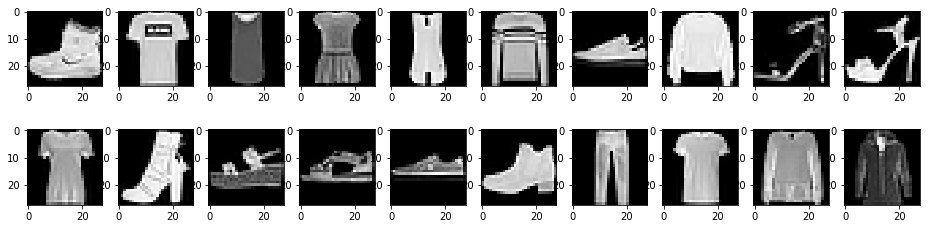

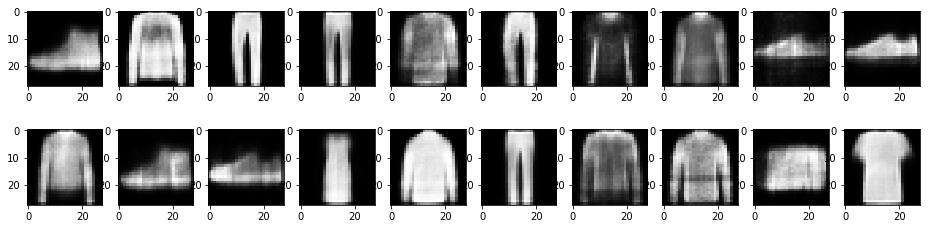

In [5]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

plt.figure(figsize=(16, 4))
for i in range(0,20):
    plt.subplot(2, 10, i+1)
    plt.imshow(I_train[i,:], cmap='gray')

plt.figure(figsize=(16, 4))
for i in range(0,20):
    plt.subplot(2, 10, i+1)
    plt.imshow(decoded_imgs[i,:].reshape(28, 28), cmap='gray')

In [28]:
def build_cnn_autoencoder():
    input_img = Input(shape=(28, 28 ,1))
    
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)

    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = Model(input_img, decoded)
    
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    display(autoencoder.summary())
    
    return autoencoder

In [34]:
I_train = I_train.reshape( (len(I_train), 28, 28, 1) )
I_test = I_test.reshape( (len(I_test), 28, 28, 1) )

autoencoder_cnn = build_cnn_autoencoder()
autoencoder_cnn.fit(I_train, I_train,
                    epochs=50,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(I_test, I_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 4, 4, 8)           0         
__________

None

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 153us/step - loss: 0.3728 - val_loss: 0.3253
Epoch 2/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.3158 - val_loss: 0.3111
Epoch 3/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.3061 - val_loss: 0.3005
Epoch 4/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.3012 - val_loss: 0.3008
Epoch 5/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.2976 - val_loss: 0.3007
Epoch 6/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.2953 - val_loss: 0.2955
Epoch 7/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.2936 - val_loss: 0.2931
Epoch 8/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.2919 - val_loss: 0.2937
Epoch 9/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.2910 - val_loss: 0.2916
Ep

In [35]:
I_test_predict = autoencoder_cnn.predict(I_test)

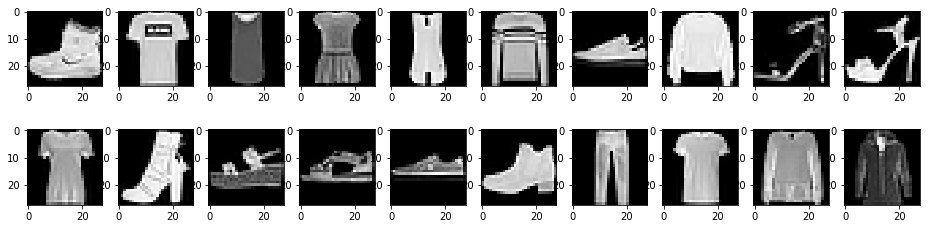

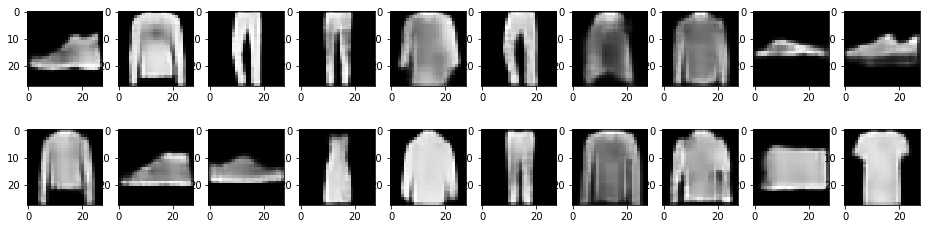

In [38]:
plt.figure(figsize=(16, 4))
for i in range(0,20):
    plt.subplot(2, 10, i+1)
    plt.imshow(I_train[i,:].reshape(28, 28), cmap='gray')

plt.figure(figsize=(16, 4))
for i in range(0,20):
    plt.subplot(2, 10, i+1)
    plt.imshow(I_test_predict[i,:].reshape(28, 28), cmap='gray')